<a href="https://colab.research.google.com/github/simodepth96/analytics-/blob/main/Health_Check_Search_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monthly Health Checks

1. Data Cleaning (Partial)
2. Data Profiling
3. Clicks & Impressions Spread
4. Query Count by Positions
5. Query Count by Clicks 
6. Change of Position by Clicks
7. Data Cleaning (non-branded queries)
8. Traffic Anomalies Mapping
9. Non-Branded Queries Variations

##Instructions

- Submit an XLSX export file from Search Analytics collecting insights from the **last 3 months**

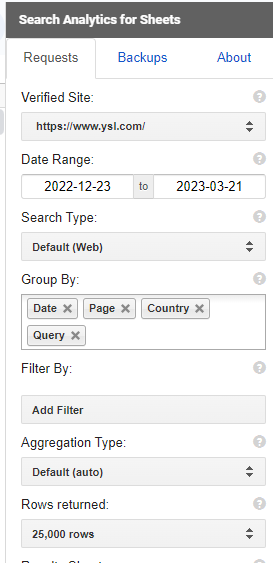

##Crucial metrics to track

👉 **Unique Query Count**: This is crucial to see which pages have more opportunities.

👉 **Page Groups**: Dividing pages into groups based on their performance. E.g. pages with many clicks can be classified as "High Performers".

👉 **Content Decay**[not here]: it measures if your content has been losing traction (traffic)

👉 **Contribution to total clicks**[not here]: what's the weight of a single page? If a page gets you 10% of your total clicks, it means it's quite important.

👉 **Custom Events**[not here]: anything you have set up in Analytics or Tag Manager that makes sense. This includes tracking CTAs or any other interaction.

In [ ]:
!pip install adtk
!pip install advertools
!pip install plotly 
!pip install --upgrade adviz 
!pip install "pandas[all]>=2.0.0" 
!pip install -U pandas-profiling 
!pip install -U kaleido 
!pip install -U ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.2/277.2 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display_html
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import advertools as adv
import adviz
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import kaleido.scopes.plotly as kaleido
from webcolors import hex_to_rgb
import plotly.express as px
#to reset the original pandas tables rendering
from google.colab import data_table
data_table.disable_dataframe_formatter()

import requests
import json
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import PersistAD

# utils
import datetime

#data profiling
from pathlib import Path
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file


INFO:visions.backends:Pandas backend loaded 1.5.3
INFO:visions.backends:Numpy backend loaded 1.22.4
INFO:visions.backends:Pyspark backend NOT loaded
INFO:visions.backends:Python backend loaded


In [ ]:
#@title Import Google Search Console Dataset with an Overview of Pages and Queries

import pandas as pd

# Read CSV file
x = pd.read_excel("/content/Untitled spreadsheet (3).xlsx",
                        parse_dates=[1])

'''
The "parse_dates" argument is used to automatically parse any columns in the Excel file that contain date values.
'''

# Create a new DataFrame with selected columns
brand = pd.DataFrame(x, columns=['Date', 'Page', 'Country', 'Query', 'Clicks', 'Impressions', 'CTR', 'Position'])

# Convert 'Date' column to proper format and set it as index
brand['Date'] = pd.to_datetime(brand['Date'])

#Data Cleaning
# Convert 'Position' column into integers and format data types for specific columns
brand['Position'] = brand['Position'].astype(int)
# brand['Impressions'] = brand['Impressions'].astype(int)
brand['Clicks'] = brand['Clicks'].astype(int)
brand['Position'] = brand['Position'].round(decimals=1)
brand['CTR'] = brand['CTR'].round(decimals=2)
brand['Query'] = brand['Query'].astype(str)

print(len(brand))
brand.head()


25000


,Date,Page,Country,Query,Clicks,Impressions,CTR,Position
0,2023-05-06,https://www.alexandermcqueen.com/,gbr,alexander mcqueen,1828,38700,0.05,1
1,2023-05-06,https://www.alexandermcqueen.com/,usa,alexander mcqueen,1516,20409,0.07,1
2,2023-05-07,https://www.alexandermcqueen.com/,usa,alexander mcqueen,1364,17073,0.08,1
3,2023-05-08,https://www.alexandermcqueen.com/,usa,alexander mcqueen,1153,13818,0.08,1
4,2023-03-19,https://www.alexandermcqueen.com/,usa,alexander mcqueen,970,11724,0.08,1


In [ ]:
#perform some basic summary statistics on the datase
brand.describe()

#Overview of the most browsed countries in the last 30 days

In [ ]:
adviz.url_structure(
    url_list=brand['Page'],
    theme='ggplot2',#plotly_dark
    domain='balenciaga.com', #change with the domain name
    title='URL structure: <b>balenciaga.com</b><br>Raw data: <a href="/content/AMQ.xlsx">boucheron.com URLs</a>') #change with the domain name

In [ ]:
#@title Look at the number of unique values in each column  
#.nunique() counts the number of unique values in each column 
brand.nunique() 

date                   147
page                   151
country                125
query                  273
clicks                 391
impressions           3847
ctr                     81
position                10
preprocessed_query     273
dtype: int64

#Data Cleaning (Partial as branded queries are not being removed yet)

remove:
- Pages that are not supposed to rank (About Us, Privacy Policy, etc.)
- Pagination, because it's only noise
- Foreign queries, like Japanese queries on a US website
- Non-HTML files (CSS, JS, PDF)
- Filler pages (/blog/, /tag/, /category/)

In [ ]:
#@title Look at the Types od Data
brand.dtypes

date                  datetime64[ns]
page                          object
country                       object
query                         object
clicks                         int64
impressions                    int64
ctr                          float64
position                       int64
preprocessed_query            object
dtype: object

## IF there were some Floats, then the next section about looking for missing data will require to go a bit more in-depth since the **`isna` function will not return results for floats**

#Mising Data
---

- **Missing Completely at Random (MCAR)**= no logical reason why data is missing. Pure chance.

E.g. technical problems, glitches from reporting on:
GSC search performance
Ahrefs 
Screaming frog crawls


- **Missing at Random** = systematic relationship between missing values and the observed data.
**P(A|B) = P(A)**
So here missing values exist due to another variable in your dataset.

E.g. If no-indexed pages (Indexability column) are more likely to have an empty meta description, it would fall under MAR. 


- **Missing Not at Random (MNAR)**: missing data due to a human error.

E.g. pages with more traffic are less likely to have meta descriptions. This implies you didn't connect any API with traffic data.


In [ ]:
#@title Look for missing data
# counts the number of missing values in each column 
df.isna().sum() 

date                  0
page                  0
country               0
query                 0
clicks                0
impressions           0
ctr                   0
position              0
preprocessed_query    0
dtype: int64

#Removing prefixes from URLs

In [ ]:
# .str.lstrip('https://') removes the “https://” from the left side of the string
df['page'] = df['page'].str.lstrip('https://') 
 
# .str.lstrip('www.') removes the “www.” from the left side of the string
df['page'] = df['page'].str.lstrip('www.') 
 
# the .head(10) function will show us the first 10 rows in our dataset
df.head(10)

,date,page,country,query,clicks,impressions,ctr,position,preprocessed_query
0,2023-05-06,alexandermcqueen.com/,gbr,alexander mcqueen,1828,38700,0.05,1,alexander mcqueen
1,2023-05-06,alexandermcqueen.com/,usa,alexander mcqueen,1516,20409,0.07,1,alexander mcqueen
2,2023-05-07,alexandermcqueen.com/,usa,alexander mcqueen,1364,17073,0.08,1,alexander mcqueen
3,2023-05-08,alexandermcqueen.com/,usa,alexander mcqueen,1153,13818,0.08,1,alexander mcqueen
4,2023-03-19,alexandermcqueen.com/,usa,alexander mcqueen,970,11724,0.08,1,alexander mcqueen
5,2023-03-12,alexandermcqueen.com/,usa,alexander mcqueen,897,9442,0.10,1,alexander mcqueen
6,2023-03-14,alexandermcqueen.com/,usa,alexander mcqueen,877,9131,0.10,1,alexander mcqueen
7,2023-03-10,alexandermcqueen.com/,usa,alexander mcqueen,876,9404,0.09,1,alexander mcqueen
8,2023-01-18,alexandermcqueen.com/,usa,alexander mcqueen,866,10331,0.08,1,alexander mcqueen
9,2023-03-13,alexandermcqueen.com/,usa,alexander mcqueen,862,9348,0.09,1,alexander mcqueen


In [ ]:
#@title Drop Duplicates from the specified columns
brand.drop_duplicates(['Query', 'Page'], inplace=True)

In [ ]:
#@title 1️⃣ Data cleaning: remove unnecessary Pages

# Define a list of strings to use as a filter for the 'Page' column
filter_page = ['notfound', 'legal', 'customer', 'statement','conditions', 'politique','mentions', 'index', 'code' 'privacy', 'cookie','note', 'credits']

# Use the '~' operator to negate the result of the 'str.contains()' method,
# and keep only the rows where the 'Address' column does NOT contain any of the filter strings
brand = brand[~brand['Page'].str.contains("|".join(filter_page))]

# Keep only the 'Address' column in the resulting DataFrame
#brand = brand[['Page']]

len(brand.Page.unique())

150

In [ ]:
#@title 2️⃣ Remove Non-ASCII characters
def is_ascii(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

# this line of code applies the function to the query column of the dataframe.
brand = brand[brand['Query'].map(lambda x: is_ascii(x))]


#Generate a Data Profiling Report
An overview of the most relevant data analysis insights from the **cleaned dataset**, including:

- count of the most frequent queries
- count of the most frequent pages
- count of the most frequent countries
- distribution & outliers representation of the spread of clicks & impressions
- correlation analysis 


In [ ]:
#re-perform some basic summary statistics on the datase
df.describe()

In [ ]:
#@title OPTIONAL - Data profiling
profile = ProfileReport(brand, title="Profiling Report", html={"style": {"full_width": True}}, sort=None)

In [ ]:
# The HTML report in an iframe
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Clicks & Impressions Spread with a Boxplot

A box plot is a method for demonstrating the locality, spread and skewness groups of numerical data through their quartile.

The box plot is suitable for comparing range and distribution for groups of numerical data.

**Advantages**: organizes large amounts of data, and visualizes outlier values.

**Disadvantages**:  not relevant for detailed analysis of the data as it deals with a summary of the data distribution.

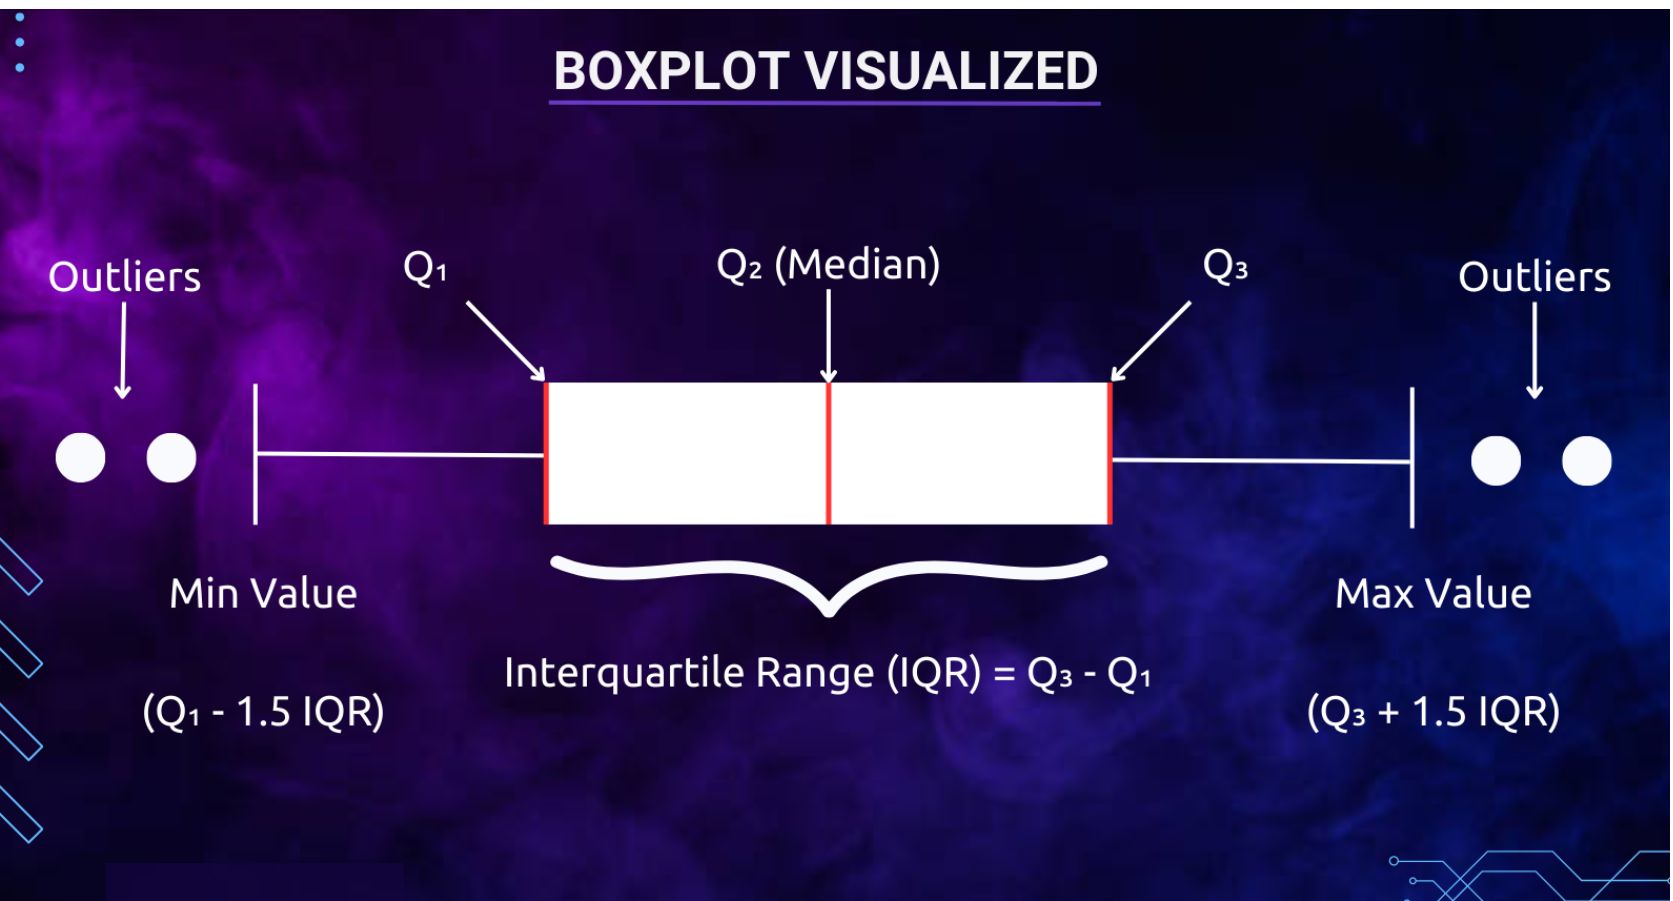

In [ ]:
import pandas as pd
# Load data from CSV file
#df = pd.read_excel('/content/Book1.xlsx')

# Create a boxplot of Clicks and Impressions columns using Plotly Express
fig = px.box(brand,
             y=['Clicks', 'Impressions'],
             orientation='v',
             template='plotly_dark',
             width=1024,
             height=600)

# Add labels and title
fig.update_layout(xaxis_title='Clicks & Impressions', title='Boxplot of Clicks and Impressions')

# Display the plot
fig.show()



For Impressions, the median value sits around 500, which can be translated as 
##**“50% of the observations have less than 500 impressions”**


The rest of the data spreading around the graph are just isolated **outliers**

##⚠️ BEWARE YOU WILL LIKELY SEE **SIMILAR PATTERNS ACROSS ECOMMERCE WEBSITES** AS IT'S NORMAL HOMEPAGE, PLP WILL RECEIVE MORE CLICKS THAN ALL THE OTHER PRODUCT STOCK PAGES

#IQR calculation to trim away Outliers 

Inter-Quartile Range (IQR): The difference between the 75th and 25th percentile values.

IQR is very good at trimming away outliers.

We can use it to assess the **statistical spread of distribution** when it is particularly skewed, therefore has a lot of outliers.

- For highly skewed data or data with extreme outliers, we might prefer to use **IQR**

- For data that is more normally distributed, the **variance and standard deviation **are frequently reported.

In [ ]:
# Interquartile range
brand.Impressions.quantile(0.75) - brand.Impressions.quantile(0.25)

534.0

👉 Find which position bands displayed more variability

👉 Start asking questions about seasonality (not confirming it, only asking)

👉 Assess progress over time

This analysis gives you an overview of the situation and needs a deep dive to be more actionable.
But even so, you can find anomalies or interesting patterns in the query count that can lead to quick improvement or growth.

#Query Count in Top 10 Positions

While Impressions are a good leading indicator, they don't tell you anything about the queries you rank for.

**Counting the number of queries will help spot weak areas or pinpoint pages with more opportunities.**

In [ ]:
query_counts = brand.Query.value_counts()
print(query_counts)

alexander mcqueen                   54
mcqueen                             21
alexander mcqueen shoes             16
alexander mcqueen sneakers          14
mc queen                             8
                                    ..
basket alexander mcqueen             1
553770                               1
all black alexander mcqueen          1
black and gold alexander mcqueen     1
men alexander mcqueen shoes          1
Name: query, Length: 214, dtype: int64


In [ ]:
#measure the proportion of queries in the cleaned dataset
query_props = brand.Query.value_counts(normalize=True)
print(query_props)

technoclogs      0.500000
steroid boots    0.166667
adidas heels     0.166667
cagole           0.166667
Name: Query, dtype: float64


In [ ]:
top_10_count_queries_df = brand.groupby("month").agg(
    clicks = ('Clicks', 'sum'),
    impressions = ('Impressions', 'sum'),
    position = ('Position', 'mean'),
    count_queries = ('Query', 'count')
    ).reset_index()

fig = px.line(top_10_count_queries_df, x="month", y="count_queries",
              labels={'month': 'Date', 'count_queries': 'Unique Queries'},
              title="No. of Unique Queries Ranking in Top Positions in Google in USA")

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Unique Queries')

fig.show()

print(len(top_10_count_queries_df))

5


# Data Transformation: Query Count Tracking by Classes of Clicks

**Data transformation** is the process to convert data from one format to another, e.g. from a number to a class.

It means creating new metrics that are tailored to you.

This part will help us divide pages into groups based on their performance by creating new metrics.
 
 E.g. pages with many clicks can be classified as "**High Performers**".



In [ ]:
#keywords a Page is ranking for
df['n_kws_Page_ranks_for'] = df['Page'].map(df.groupby('Page')['Page'].count())
rows = len(df)
df['percent_kws_Page_ranks_for'] = (df['n_kws_Page_ranks_for'] / rows * 100).round(2)

#feature engineering 
df.fillna({"Impressions": 0, "Clicks": 0, "Position": 0}, inplace=True)
df = df.astype({"Impressions": int, "Clicks": int, "Position": int})
#create new colummns
df['total_Clicks_Page'] = df['Clicks'].groupby(df['Page']).transform('sum')
df['total_Page_imps_percent'] = df['Impressions'].groupby(df['Page']).transform('sum')
#percentages
df['total_Page_Clicks_percent'] = (df['total_Clicks_Page'] / sum(df['Clicks']) * 100).round(2)
df['Page_percent_imps'] = (df['total_Page_imps_percent'] / sum(df['Impressions']) * 100).round(2)
df = df.round(2)

#add leading queries
df.drop_duplicates(inplace=True)

# Group the data by the URL and sort the queries by the number of Clicks
df_Clicks = df.groupby('Page')['Query', 'Clicks'].apply(lambda x: x.sort_values('Clicks', ascending=False))

# Select the first row of each group (the Query with the highest number of Clicks)
df_Clicks = df_Clicks.groupby('Page').first()

# Group the data by the URL and sort the queries by the number of Impressions
df_Impressions = df.groupby('Page')['Query', 'Impressions'].apply(lambda x: x.sort_values('Impressions', ascending=False))

# Select the first row of each group (the Query with the highest number of Impressions)
df_Impressions = df_Impressions.groupby('Page').first()

df['leading_Query_by_Clicks'] = df['Page'].map(df_Clicks['Query'])
df['leading_Query_by_Impressions'] = df['Page'].map(df_Impressions['Query'])

<ipython-input-22-a5c90461ee4a>:21: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-22-a5c90461ee4a>:27: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# find number of bins with Sturges' Rule
n_bins = 1 + int(np.log(len(df)))
#create bands based on Clicks. Having more values in low groups means you are weaker to avg. Position drops. 
def label_bands (row):
   if row['Clicks'] == 0:
      return '0-click'
   if row['Clicks'] == 1:
      return '1-click'
   if 2 <= row['Clicks'] <= 20:
      return '2-to-20'
   if 21 <= row['Clicks'] <= 100:
      return '21-100'
   return '100+'

grpd = df.groupby(["Query"]).agg({"Clicks": "sum"}).sort_values(by="Clicks", ascending=False)
grpd['Clicks_category'] = grpd.apply(lambda x: label_bands(x), axis=1)
df = df.merge(right=grpd.reset_index()[['Query', 'Clicks_category']], on="Query", how="inner")

#create bands based on Impressions. 
def label_bands_Impressions (row):
   if row['Impressions'] == 1:
      return '1-imp'
   if 2 <= row['Impressions'] <= 20:
      return '2-to-20'
   if 21 <= row['Impressions'] <= 100:
      return '21-100'
   return '100+'

grpd = df.groupby(["Query"]).agg({"Impressions": "sum"}).sort_values(by="Impressions", ascending=False)
grpd['Impressions_category'] = grpd.apply(lambda x: label_bands_Impressions(x), axis=1)
df = df.merge(right=grpd.reset_index()[['Query', 'Impressions_category']], on="Query", how="inner")

#plot
df['Date'] = df.Date.dt.month

def plot_Clicks_by_month(df):
  # create a new column with the month for each date

  # group the data by Query band and month, and sum the number of Clicks
    df = df.groupby(['Clicks_category', 'Date'])['Query'].nunique().reset_index()

  # use Plotly to create a line chart with the sum of Clicks on the y-axis
  # and the month on the x-axis, and a separate line for each Query band
    fig = px.line(df, x='Date', y='Query', color='Clicks_category',
               template='plotly_dark', width=1024, height=600, labels={'month': 'Month', 'Query':'Unique Query count'})
    fig.update_xaxes(dtick="M1", tickformat="%Y-%m")
    fig.update_yaxes(autorange=True)
    fig.show()
    fig.write_image("Query_over_time.png")

plot_Clicks_by_month(df)

KeyError: ignored

In [ ]:
#@title Group Query by Clicks in a certain Month
brand.groupby(['Query','month','Position'])['Clicks'].nunique().reset_index()



,Query,month,Position,Clicks
0,adidas heels,1,1,1
1,cagole,4,2,1
2,steroid boots,4,1,1
3,technoclogs,3,1,2
4,technoclogs,3,2,1


#Change of Positions by Clicks over time

This will help you understand if the loss in traffic is likely due to **lost keyword ranking** or a **decline in search traffic** due to better results on the SERP

- **avg. position decrease** = loss of keyword rankings

- **loss in clicks** = decline in search traffic

If clicks decrease, this is a sign competitors are stealing shares of traffic and potential customers from your client.

This will inform your course of action

In [ ]:
ranking_pages = brand.head(25).pivot_table(index='Position', columns='month', values = "Clicks", aggfunc='count', fill_value=0)
ranking_pages.rename(columns={
    1: 'January',
    2: 'February',
    3: 'March',
    4:'April'
}, inplace=True)
heatmap = px.imshow(ranking_pages, text_auto=True)
heatmap.update_layout(
     title='Change of Positions by Page Clicks over time',
     template='plotly_dark', 
     xaxis_title='',
     yaxis_title='Rankings',
     width=1024, 
     height=600,
     legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
        ))
heatmap.show()



# Track Query variations over time




In [ ]:
brand = brand.groupby(['Position', 'month'])['Query'].nunique().reset_index()
fig = px.line(brand, x='month', y='Query', color='Position',
                  template='plotly_dark', width=1024, height=600, labels={'month': 'Month', 'Query':'Unique query count'})
fig.update_xaxes(dtick="M1", tickformat="%Y-%m")
fig.update_yaxes(autorange=True)
fig.update_layout(title='Query variations over time')
fig.show()

plot_clicks_by_month(brand)


# Data Cleaning - remove non-branded queries


Here are the top branded queries for each brand that need to be removed from the dataset.

1. **BVG**

df = df[~df['Top queries'].str.contains('bottega veneta|bottega|botega|veneta|bv|botegga|votegga|vottega|b v|bodega', case=False)]

2. **BAL**

df = df[~df['Top queries'].str.contains('balanceiga|balanciago|belenciago|balen ciaga|leopold ballerina|ballanciaga|baldnciaga|belenciga|balecianga|balancega|ba len cia ga|balen iaga|beleciaga|balenziaga|betciaga|balenciaga|valenciaga|balanciaga|balenciga|belenciaga|balencia|baleciaga|balensiaga|ballenciaga|baleciga|valensiaga|balencizga|baliciaga|balenclaga|ba l en ci a ga|balencaga|balrnciaga|alenciaga|ba len ci a ga|ba len ciaga|baalenciaga|baenciaga|bakenciaga|balaciaga|balaenciaga|balanceaga|balanceiaga|balanciage|balanciega|balanciga|balansiaga|balciaga|bale ciaga|bale.ciaga|balemciaga|balenc|balencaiga|balenceaga|balencigia|balenciqga|balencisga|balencoaga|balencuaga|balengia|balengiaca|balengiaga|balengica|baleniaga|balenicaga|balenviaga|balenxiaga|balienciaga|balinciaga|balnciaga|balneciaga|balwnciaga|bb sunglasses|belanciaga|belinciaga|blaenciaga|blanciaga|blenciaga|bottle slippers|bslenciaga', case=False)]
3. **AMQ** 

df = df[~df['Top queries'].str.contains('alexander mcqueen|mcqueen|mc queen|alexander|alaxander|mac queen|macqueen|mcq|maqueens|mqueen|alex queen|aleksandar mekvin|mequeen|maqeen|mqqueen|aleksander mequin|mecqueen|mc qeen|mc quen|alexandra maqueen|mc quenn|mq queen|amq sneakers|mqeen|alexand|mc.queen|mccqueen|alexandra shoes', case=False)]
df.head()

4. **YSL**

df = df[~df['Top queries'].str.contains('ysl|saint laurent|saint lauren| st laurent|saintlaurent|saint laurant|st laurent|yves laurent|laurent|yvs|yls|yves|yvews saint|ysant lauren|yev sen loran|vsl brand|saint.laurent|saint loran|sant laurent|sain laurent|vsl bag|saint lairent|iv sen lorant|yvsen loran|yves saint lairent|sl 461 betty|sl 276 mica|saint|y s l|saint lurent|lsv purse|iv sen loran|yal bag|saint yves laurent|evsen loran|saint-laurent|ysl bag|vls bag|saint larent|sl m103|saintlauren|st laurant|sl m119 blaze', case=False)]
df

5. **Kering**
df = df[~df['Top queries'].str.contains('karing|karing group|kearing|kearing group|keering|keering group|keing|keiring|keiring group|keirng|keri g|keri.g|keribg|kerig|kerig group|kerign|keriing|kerimg|kerin group|kerinf|kerinh|keryng|keurig fashion|keyring eyewear|keyring group|khering|kiering|kiring|kreing|kwring|leo rongone|lering', case=False)]


6. **Boucheron**
df = df[~df['Top queries'].str.contains('bouxheron|boicheron|bosheron|boshron|bouheron|boucehron|boucgeron|boucharon|boucheon|boucheran|bouchorn|bouchren|bouchuron|boushron|bucharon|buchelon|buocheron|burcheon|burcheron|burchon|bushuronn|boucheron|biucheron|boucherin|bicheron|bucheron|beucheron|biucherin|blucheron|bocheron|biucheron|bochron|bochuron|bochron|bocheron|bouchero|bousheron|busheron|bucheron|bouceron|bourcheron|buchron|boncheron|bouvheron|boucherons|busyuronn|boycheron|bouncheron|bushron|bouchelon|bouheron|boucheorn|oucheron|boucheeon|bucheron|bouchoron|boucherone|bouchron|bouchern|bpucheron|boucheton|boucherpn|bouchrron|bouchroun|boucheroun|blucheron|bouchen|baucheron|boucjeron|buscheron|boucherron|bouchreon|noucheron', case=False)]
df.to_excel('kerting.xlsx',index=False)
df

Next, we're going to strip any **non-ASCII characters** that may soil our output


In [ ]:
#@title 3️⃣ Remove branded queries
brand = brand[~brand['Query'].str.contains('balanceiga|balanciago|belenciago|balen ciaga|leopold ballerina|ballanciaga|baldnciaga|belenciga|balecianga|balancega|ba len cia ga|balen iaga|beleciaga|balenziaga|betciaga|balenciaga|valenciaga|balanciaga|balenciga|belenciaga|balencia|baleciaga|balensiaga|ballenciaga|baleciga|valensiaga|balencizga|baliciaga|balenclaga|ba l en ci a ga|balencaga|balrnciaga|alenciaga|ba len ci a ga|ba len ciaga|baalenciaga|baenciaga|bakenciaga|balaciaga|balaenciaga|balanceaga|balanceiaga|balanciage|balanciega|balanciga|balansiaga|balciaga|bale ciaga|bale.ciaga|balemciaga|balenc|balencaiga|balenceaga|balencigia|balenciqga|balencisga|balencoaga|balencuaga|balengia|balengiaca|balengiaga|balengica|baleniaga|balenicaga|balenviaga|balenxiaga|balienciaga|balinciaga|balnciaga|balneciaga|balwnciaga|bb sunglasses|belanciaga|belinciaga|blaenciaga|blanciaga|blenciaga|bottle slippers|bslenciaga', case=False)]
#brand.to_excel('ketring.xlsx',index=False)
print(len(brand))
brand


6


,Date,Page,Country,Query,Clicks,Impressions,CTR,Position
2953,2023-03-23,https://www.balenciaga.com/en-us/all/shoes/technoclog,usa,technoclogs,145,354,0.41,1
14966,2023-03-23,https://www.balenciaga.com/en-gb/technoclog--black-739861W0FO81000.html,usa,technoclogs,23,354,0.06,2
15860,2023-04-19,https://www.balenciaga.com/en-us/steroid-boot-black-717807W0FOI1000.html,ita,steroid boots,22,1040,0.02,1
19195,2023-03-23,https://www.balenciaga.com/de-de/technoclog-pantolette-schwarz-739861W0FO81000.html,deu,technoclogs,18,35,0.51,1
20885,2023-01-19,https://www.balenciaga.com/en-us/women/shoes/adidas,usa,adidas heels,16,105,0.15,1
23121,2023-04-11,https://www.balenciaga.com/es-es/mujer/bolsos/le-cagole,mex,cagole,15,569,0.03,2


In [ ]:
#@title Extract Months
# Extract month from 'Date' column and add a new 'month' column
brand['month'] = brand['Date'].dt.month

# Display the first few rows of the DataFrame
brand.head()

,Date,Page,Country,Query,Clicks,Impressions,CTR,Position,month
2953,2023-03-23,https://www.balenciaga.com/en-us/all/shoes/technoclog,usa,technoclogs,145,354,0.41,1,3
14966,2023-03-23,https://www.balenciaga.com/en-gb/technoclog--black-739861W0FO81000.html,usa,technoclogs,23,354,0.06,2,3
15860,2023-04-19,https://www.balenciaga.com/en-us/steroid-boot-black-717807W0FOI1000.html,ita,steroid boots,22,1040,0.02,1,4
19195,2023-03-23,https://www.balenciaga.com/de-de/technoclog-pantolette-schwarz-739861W0FO81000.html,deu,technoclogs,18,35,0.51,1,3
20885,2023-01-19,https://www.balenciaga.com/en-us/women/shoes/adidas,usa,adidas heels,16,105,0.15,1,1


#Traffic Anomalies Mapping

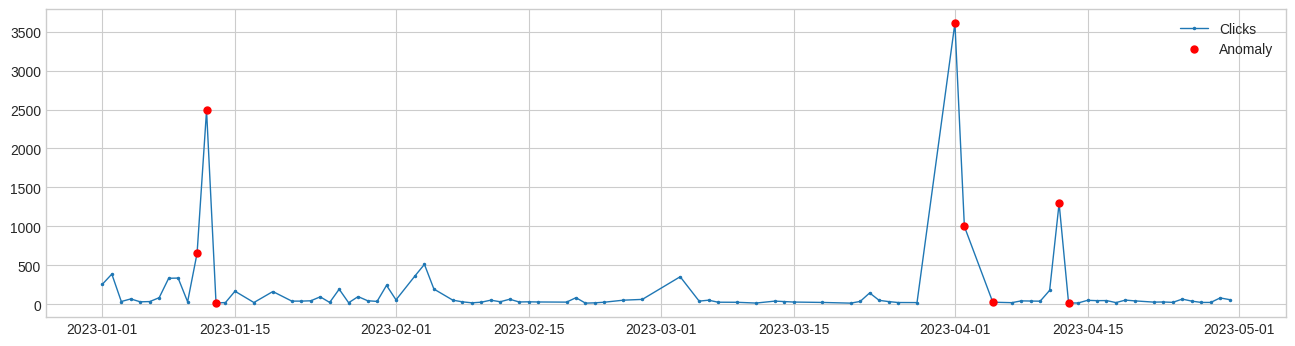

In [ ]:
#@title Plot Impressions Anomalies

#set Date as index
brand = brand.set_index('Date')

#you can change the variable to inspect anomalies from = Clicks, CTR

s = validate_series(brand['Impressions'])

#use PersistAD to plot both negative and positive anomalies 
persist_ad = PersistAD(c=2, side='both')
anomalies = persist_ad.fit_detect(s)


chart = plot(s, 
     anomaly=anomalies, 
     ts_linewidth=1, 
     ts_markersize=3, 
     anomaly_markersize=5, 
     anomaly_color='red', 
     anomaly_tag='marker')



In [ ]:
#@title Track Volatility and Seasonality when you have > 12 months data
from adtk.detector import LevelShiftAD
from adtk.detector import VolatilityShiftAD
from adtk.detector import SeasonalAD

#volatility
volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s)

#seasonality
seasonal_ad = SeasonalAD(c=2, side="both", trend=True)
anomalies = seasonal_ad.fit_detect(s)

#Non-Branded Query Changes

##Instructions

1. Use Google Search Console to retrieve data from the last 28 days > Search Results > Compare > Custom
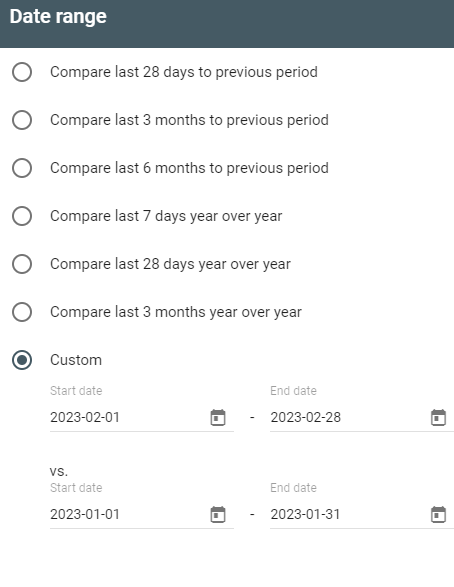


2. Export in XLSX
3. Follow the steps below

In [ ]:
!pip install plotly
!pip install adviz
import plotly.express as px
import pandas as pd
import adviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Import the data
df = pd.read_excel('/content/https___www.balenciaga.com_-Performance-on-Search-2023-05-12 (1).xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Top queries,01/04/2023 - 30/04/2023 Clicks,01/03/2023 - 31/03/2023 Clicks,01/04/2023 - 30/04/2023 Impressions,01/03/2023 - 31/03/2023 Impressions,01/04/2023 - 30/04/2023 CTR,01/03/2023 - 31/03/2023 CTR,01/04/2023 - 30/04/2023 Position,01/03/2023 - 31/03/2023 Position
0,balenciaga,397987,347958,3003783,2506032,0.1325,0.1388,1.06,1.04
1,balenciaga shoes,26517,20496,344026,319603,0.0771,0.0641,1.20,1.22
2,バレンシアガ,24474,33018,129673,143550,0.1887,0.2300,1.01,1.01
3,バレンシアガ 財布,8743,11989,36207,47365,0.2415,0.2531,1.01,1.01
4,balenciaga bag,8740,7052,99496,99438,0.0878,0.0709,1.15,1.12


In [ ]:
#@title Data Cleaning
#rename columns
cols = ['Top queries',	'Last 28 days Clicks', 'Previous 28 days Clicks','Last 28 days Impressions', 'Previous 28 days Impressions',	'Last 28 days CTR','Previous 28 days CTR',	'Last 28 days Position','Previous 28 days Position']
df.columns= cols

#drop some columns
df = df.drop(['Last 28 days Impressions',	'Previous 28 days Impressions',	'Previous 28 days CTR','Last 28 days CTR',	'Previous 28 days Position', 'Last 28 days Position',], axis=1) 
df

,Top queries,Last 28 days Clicks,Previous 28 days Clicks
0,balenciaga,397987,347958
1,balenciaga shoes,26517,20496
2,バレンシアガ,24474,33018
3,バレンシアガ 財布,8743,11989
4,balenciaga bag,8740,7052
...,...,...,...
1115,バレンシアガ アウター,0,48
1116,balenciaga for kids,0,48
1117,adidasバレンシアガ,0,48
1118,balenciaga × adidas,0,48


# Data Cleaning - remove branded queries & non-ASCII characters


Here are the top branded queries for each brand that need to be removed from the dataset.

1. **BVG**

df = df[~df['Top queries'].str.contains('bottega veneta|bottega|botega|veneta|bv|botegga|votegga|vottega|b v|bodega', case=False)]

2. **BAL**

df = df[~df['Top queries'].str.contains('balanceiga|balanciago|belenciago|balen ciaga|leopold ballerina|ballanciaga|baldnciaga|belenciga|balecianga|balancega|ba len cia ga|balen iaga|beleciaga|balenziaga|betciaga|balenciaga|valenciaga|balanciaga|balenciga|belenciaga|balencia|baleciaga|balensiaga|ballenciaga|baleciga|valensiaga|balencizga|baliciaga|balenclaga|ba l en ci a ga|balencaga|balrnciaga|alenciaga|ba len ci a ga|ba len ciaga|baalenciaga|baenciaga|bakenciaga|balaciaga|balaenciaga|balanceaga|balanceiaga|balanciage|balanciega|balanciga|balansiaga|balciaga|bale ciaga|bale.ciaga|balemciaga|balenc|balencaiga|balenceaga|balencigia|balenciqga|balencisga|balencoaga|balencuaga|balengia|balengiaca|balengiaga|balengica|baleniaga|balenicaga|balenviaga|balenxiaga|balienciaga|balinciaga|balnciaga|balneciaga|balwnciaga|bb sunglasses|belanciaga|belinciaga|blaenciaga|blanciaga|blenciaga|bottle slippers|bslenciaga', case=False)]
3. **AMQ** 

df = df[~df['Top queries'].str.contains('alexander mcqueen|mcqueen|mc queen|alexander|alaxander|mac queen|macqueen|mcq|maqueens|mqueen|alex queen|aleksandar mekvin|mequeen|maqeen|mqqueen|aleksander mequin|mecqueen|mc qeen|mc quen|alexandra maqueen|mc quenn|mq queen|amq sneakers|mqeen|alexand|mc.queen|mccqueen|alexandra shoes', case=False)]
df.head()

4. **YSL**

df = df[~df['Top queries'].str.contains('ysl|saint laurent|saint lauren| st laurent|saintlaurent|saint laurant|st laurent|yves laurent|laurent|yvs|yls|yves|yvews saint|ysant lauren|yev sen loran|vsl brand|saint.laurent|saint loran|sant laurent|sain laurent|vsl bag|saint lairent|iv sen lorant|yvsen loran|yves saint lairent|sl 461 betty|sl 276 mica|saint|y s l|saint lurent|lsv purse|iv sen loran|yal bag|saint yves laurent|evsen loran|saint-laurent|ysl bag|vls bag|saint larent|sl m103|saintlauren|st laurant|sl m119 blaze', case=False)]
df

5. **Kering**
df = df[~df['Top queries'].str.contains('karing|karing group|kearing|kearing group|keering|keering group|keing|keiring|keiring group|keirng|keri g|keri.g|keribg|kerig|kerig group|kerign|keriing|kerimg|kerin group|kerinf|kerinh|keryng|keurig fashion|keyring eyewear|keyring group|khering|kiering|kiring|kreing|kwring|leo rongone|lering', case=False)]


6. **Boucheron**
df = df[~df['Top queries'].str.contains('bou heron|bouxheron|boicheron|bosheron|boshron|bouheron|boucehron|boucgeron|boucharon|boucheon|boucheran|bouchorn|bouchren|bouchuron|boushron|bucharon|buchelon|buocheron|burcheon|burcheron|burchon|bushuronn|boucheron|biucheron|boucherin|bicheron|bucheron|beucheron|biucherin|blucheron|bocheron|biucheron|bochron|bochuron|bochron|bocheron|bouchero|bousheron|busheron|bucheron|bouceron|bourcheron|buchron|boncheron|bouvheron|boucherons|busyuronn|boycheron|bouncheron|bushron|bouchelon|bouheron|boucheorn|oucheron|boucheeon|bucheron|bouchoron|boucherone|bouchron|bouchern|bpucheron|boucheton|boucherpn|bouchrron|bouchroun|boucheroun|blucheron|bouchen|baucheron|boucjeron|buscheron|boucherron|bouchreon|noucheron', case=False)]
df.to_excel('kerting.xlsx',index=False)
df

Next, we're going to strip any **non-ASCII characters** that may soil our output


In [ ]:
#@title Remove Non-ASCII characters
def is_ascii(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

# this line of code applies the function to the query column of the dataframe.
df = df[df['Top queries'].map(lambda x: x.isascii())]


In [ ]:
#@title remove branded queries
df = df[~df['Top queries'].str.contains('balanceiga|balanciago|belenciago|balen ciaga|leopold ballerina|ballanciaga|baldnciaga|belenciga|balecianga|balancega|ba len cia ga|balen iaga|beleciaga|balenziaga|betciaga|balenciaga|valenciaga|balanciaga|balenciga|belenciaga|balencia|baleciaga|balensiaga|ballenciaga|baleciga|valensiaga|balencizga|baliciaga|balenclaga|ba l en ci a ga|balencaga|balrnciaga|alenciaga|ba len ci a ga|ba len ciaga|baalenciaga|baenciaga|bakenciaga|balaciaga|balaenciaga|balanceaga|balanceiaga|balanciage|balanciega|balanciga|balansiaga|balciaga|bale ciaga|bale.ciaga|balemciaga|balenc|balencaiga|balenceaga|balencigia|balenciqga|balencisga|balencoaga|balencuaga|balengia|balengiaca|balengiaga|balengica|baleniaga|balenicaga|balenviaga|balenxiaga|balienciaga|balinciaga|balnciaga|balneciaga|balwnciaga|bb sunglasses|belanciaga|belinciaga|blaenciaga|blanciaga|blenciaga|bottle slippers|bslenciaga', case=False)]
#df.to_excel('kerting.xlsx',index=False)
df


,Top queries,Last 28 days Clicks,Previous 28 days Clicks
103,triple s,548,530
231,le cagole,234,229
339,3xl,164,50
383,steroid boots,147,79
453,technoclog,122,129
522,cagole,103,0
634,technoclogs,82,328
791,crocs,64,0
885,tripple s,57,0
922,triple s shoes,55,51


In [ ]:
#@title Data Manipulation: group Top Queries and create the Diff Column

# Group by category and aggregate the other metrics
df = df.groupby(['Top queries'], as_index=False).agg({'Last 28 days Clicks':'sum', 'Previous 28 days Clicks': 'sum' })

# Create a diff column
df['Diff'] = df['Last 28 days Clicks'] - df['Previous 28 days Clicks']

# Rename the columns
df.columns = ['Top queries', 'current', 'prior', 'diff']

# Sort by the `diff` columnn
df.sort_values(by='diff', ascending=False, inplace=True)

#df.to_excel('h.xlsx')
df



,Top queries,current,prior,diff
0,3xl,164,50,114
1,cagole,103,0,103
5,steroid boots,147,79,68
2,crocs,64,0,64
11,tripple s,57,0,57
4,mens destroyed baggy jeans,54,0,54
6,summer23,54,0,54
9,triple s,548,530,18
3,le cagole,234,229,5
10,triple s shoes,55,51,4


In [ ]:
#@title Plot a bar chart
fig = px.bar(df.head(50), x='Top queries', y='diff', color='diff',
             title='Queries by Difference in Clicks MoM',
             labels={'category':'Category', 'diff':'Difference in Clicks'},
             template='plotly_dark',
             height=600,
             width=1500)

# Update x-axis label orientation
fig.update_xaxes(tickangle=30)

# Show the plot
fig.show()